***Load all the libraries***

In [2]:
import numpy as np                                                  # Importing package numpys (For Numerical Python)
import pandas as pd                                                 # Importing for panel data analysis
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis) 
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
import seaborn as sns                                               # Importin seaborm library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split                # To split the data in training and testing part     
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")  

# ***Load and Audit the Data***

Importing the dataset for Big Mart Sales Prediction: train

In [4]:
train_df = pd.read_csv(filepath_or_buffer= 'https://raw.githubusercontent.com/sm24abr/Data_Repo/main/BigMartSales/train.csv')

- This data set is being taken from the **Big Mart Sales** for the purpose of **prediction**.

</br>

| Records | Features | Dataset Size |
| :-- | :-- | :-- |
| 8523 | 12 | 666.0 KB | 

</br>

|Id|Feature|Description|
|:--|:--|:--|
|01|**Item_Identifier**| Unique product ID |
|02|**Item_Weight**| 	Weight of product |
|03|**Item_Fat_Content**| Whether the product is low fat or not |
|04|**Item_Visibility**| The % of total display area of all products in a store allocated to the particular product |
|05|**Item_Type**| The category to which the product belongs |
|06|**Item_MRP**| Maximum Retail Price (list price) of the product |
|07|**Outlet_Identifier**| Unique store ID |
|08|**Outlet_Establishment_Year**| The year in which store was established |
|09|**Outlet_Size**| The size of the store in terms of ground area covered|
|10|**Outlet_Location_Type**| The type of city in which the store is located |
|11|**Outlet_Type**| Whether the outlet is just a grocery store or some sort of supermarket |
|12|**Item_Outlet_Sales**| Sales of the product in the particular store. This is the outcome variable to be predicted. |


In [5]:
train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
train_df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [ ]:
print('Shape of Train data:', train_df.shape)

Shape of Train data: (8523, 12)


# **Data Description**

- In this section we will get **description** and **statistics** about the data.

In [7]:
# Creating a copy of the original dataset
tr_df = train_df.copy()

In [ ]:
tr_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


**Observations**:

- This data has been collected during the period from **1985 - 2009**.

- The cost of the products lie between **31.29** to **266.89** dollars.

- The values for columns: **'Item_Weight'** and **'Item_Outlet_Sales'** show that it is **positively** skewed data.

- The values for column: **'Item_Visibility'** show that they have **highly positively** skewed data. Hence we may have to apply Standard Scaler nomalisation to this dataset.

- However the values for column: **'Item_Outlet_Sales'** show that it is **negatively** skewed data.

- As per the data we can drop the columns: **"Item_Identifier", "Outlet_Identifier" and "Outlet_Establishment_Year"** since they don't seem to be affecting the outcome variable **"Item_Outlet_Sales"**.


#  **Data Information**

- In this section, we will get information about the data and see some observations.


In [ ]:
tr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
tr_df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

**Observations**:

- Out of the **12 features**, there are **4 float64** datatype features(*Item_Weight, Item_Visibility, Item_MRP and Item_Outlet_Sales*), **7 object** datatype features (*Item_Identifier, Item_Fat_Content, Item_Type, Outlet_Identifier, Outlet_Size, Outlet_Location_Type and Outlet_Type*                                                                         )  and only **1 int64** datatype feature(*Outlet_Establishment_Year*). 

- The following columns have missing values:-
  - **Item_Weight  : 1463** => These values need to be replaced with average/mean of all the column values.
  - **Outlet_Size  : 2410** => These values need to be replaced with the mode value as it is a categorical variable.                               

- We may have to perform label encoding for the categorical vaariables for performing the **Linear Regresssion**.   



# **Data Preparation**

## **Missing Values**.

---



In [ ]:
# Checking the average value of column: 'Item_Weight'
tr_df['Item_Weight'].mean()

12.857645184136183

In [ ]:
# Checking the mode value of column: 'Outlet_Size'
tr_df['Outlet_Size'].mode()[0]

'Medium'

In [8]:
tr_df['Item_Weight'].fillna(tr_df['Item_Weight'].mean(),inplace = True)
tr_df['Outlet_Size'].fillna(tr_df['Outlet_Size'].mode()[0], inplace = True)

In [9]:
tr_df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

## **Inconsistent Values**.

In [10]:
# *Dropping the columns: 'Item_Identifier','Outlet_Identifier' and 'Outlet_Establishment_Year'*
tr_df.drop(['Item_Identifier','Outlet_Identifier', 'Outlet_Establishment_Year'],axis =1, inplace= True)

In [11]:
tr_df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,High,Tier 3,Supermarket Type1,994.7052


In [12]:
tr_df['Item_Fat_Content'].value_counts(dropna = False)

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

**Observations**: 
- Some inconsistent values were found in the column:**"Item_Fat_Content"** which can be finally grouped into 2 values **Low Fat** and **Regular**. 

In [13]:
# Handling of the Inconsistent Values
tr_df['Item_Fat_Content'] = tr_df['Item_Fat_Content'].replace(['LF','low fat'], 'Low Fat')
tr_df['Item_Fat_Content'] = tr_df['Item_Fat_Content'].replace(['reg'], 'Regular')

In [14]:
tr_df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [15]:
tr_df['Item_Type'].value_counts(dropna = False)

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [ ]:
tr_df['Outlet_Size'].value_counts(dropna = False)

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [ ]:
tr_df['Outlet_Type'].value_counts(dropna = False)

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [ ]:
tr_df.skew()

Item_Weight          0.090561
Item_Visibility      1.167091
Item_MRP             0.127202
Item_Outlet_Sales    1.177531
dtype: float64

**Observations**:

- The columns: **"Item_Visibility" and "Item_Outlet_Sales"** are showing highly skewed data. 

- Additionaly it is found that the column: **"Item_MRP"** is showing **positively** skewed data when its **mean (140.992782)** and **median (143.012800)** values are showing **negatively** skewed data.

In [16]:
tr_df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
Item_Weight,1.000000,-0.012049,0.024756,0.011550
Item_Visibility,-0.012049,1.000000,-0.001315,-0.128625
Item_MRP,0.024756,-0.001315,1.000000,0.567574
Item_Outlet_Sales,0.011550,-0.128625,0.567574,1.000000


**Observations**:

- The columns: **"Item_MRP" and "Item_Outlet_Sales"** are showing the highest positve correlation value of **0.567574** in this data.

- There is negative correlation between output variable **'Item_Outlet_Sales'** and the column: **"Item_Visibility"**.

- There is **No Multicollinearity** between the predictor variables.

## **Data Transformation**

- The **numerical** features of the dataset are being normalised using Standard Scaler.
- The **categorical** features of the dataset are being label encoded for preparing for Regression.

In [17]:
num_cols = tr_df.select_dtypes(include=[np.object])
num_cols

,Item_Fat_Content,Item_Type,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,Low Fat,Dairy,Medium,Tier 1,Supermarket Type1
1,Regular,Soft Drinks,Medium,Tier 3,Supermarket Type2
2,Low Fat,Meat,Medium,Tier 1,Supermarket Type1
3,Regular,Fruits and Vegetables,Medium,Tier 3,Grocery Store
4,Low Fat,Household,High,Tier 3,Supermarket Type1
...,...,...,...,...,...
8518,Low Fat,Snack Foods,High,Tier 3,Supermarket Type1
8519,Regular,Baking Goods,Medium,Tier 2,Supermarket Type1
8520,Low Fat,Health and Hygiene,Small,Tier 2,Supermarket Type1
8521,Regular,Snack Foods,Medium,Tier 3,Supermarket Type2


In [18]:
from sklearn.preprocessing import StandardScaler


num_cols = tr_df.select_dtypes(exclude = np.object)
# define standard scaler
scaler = StandardScaler()
# transform data
tr_df[num_cols.columns] = scaler.fit_transform(num_cols)
# print(scaled)
tr_df.skew()

Item_Weight          0.090561
Item_Visibility      1.167091
Item_MRP             0.127202
Item_Outlet_Sales    1.177531
dtype: float64

In [19]:
le = LabelEncoder()

Cat_cols = tr_df.select_dtypes(include = np.object)
Cat_cols

for i in Cat_cols.columns:
  tr_df[i] = le.fit_transform(tr_df[i])

In [ ]:
tr_df.describe()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8.523000e+03,8523.000000,8.523000e+03,8523.000000,8.523000e+03,8523.000000,8523.000000,8523.000000,8.523000e+03
mean,3.127265e-16,0.352693,-8.548444e-17,7.226681,-1.644427e-16,1.170832,1.112871,1.201220,1.631662e-16
std,1.000059e+00,0.477836,1.000059e+00,4.209990,1.000059e+00,0.600327,0.812757,0.796459,1.000059e+00
min,-1.964716e+00,0.000000,-1.281758e+00,0.000000,-1.761688e+00,0.000000,0.000000,0.000000,-1.258790e+00
25%,-8.395053e-01,0.000000,-7.586531e-01,4.000000,-7.574307e-01,1.000000,0.000000,1.000000,-7.894057e-01
50%,4.035383e-14,0.000000,-2.364792e-01,6.000000,3.243893e-02,1.000000,1.000000,1.000000,-2.267687e-01
75%,7.435985e-01,1.000000,5.514755e-01,10.000000,7.170372e-01,2.000000,2.000000,1.000000,5.391513e-01
max,2.009608e+00,1.000000,5.083050e+00,15.000000,2.021724e+00,2.000000,2.000000,3.000000,6.391045e+00


In [20]:
tr_df['Item_Fat_Content'].value_counts()

0    5517
1    3006
Name: Item_Fat_Content, dtype: int64

In [21]:
tr_df['Item_Type'].value_counts(dropna = False).sort_index()

0      648
1      251
2      110
3      649
4      682
5      856
6     1232
7      214
8      520
9      910
10     425
11     169
12      64
13    1200
14     445
15     148
Name: Item_Type, dtype: int64

In [22]:
tr_df['Outlet_Size'].value_counts(dropna = False).sort_index()

0     932
1    5203
2    2388
Name: Outlet_Size, dtype: int64

In [23]:
tr_df['Outlet_Type'].value_counts(dropna = False).sort_index()

0    1083
1    5577
2     928
3     935
Name: Outlet_Type, dtype: int64

# **Data Visualization**

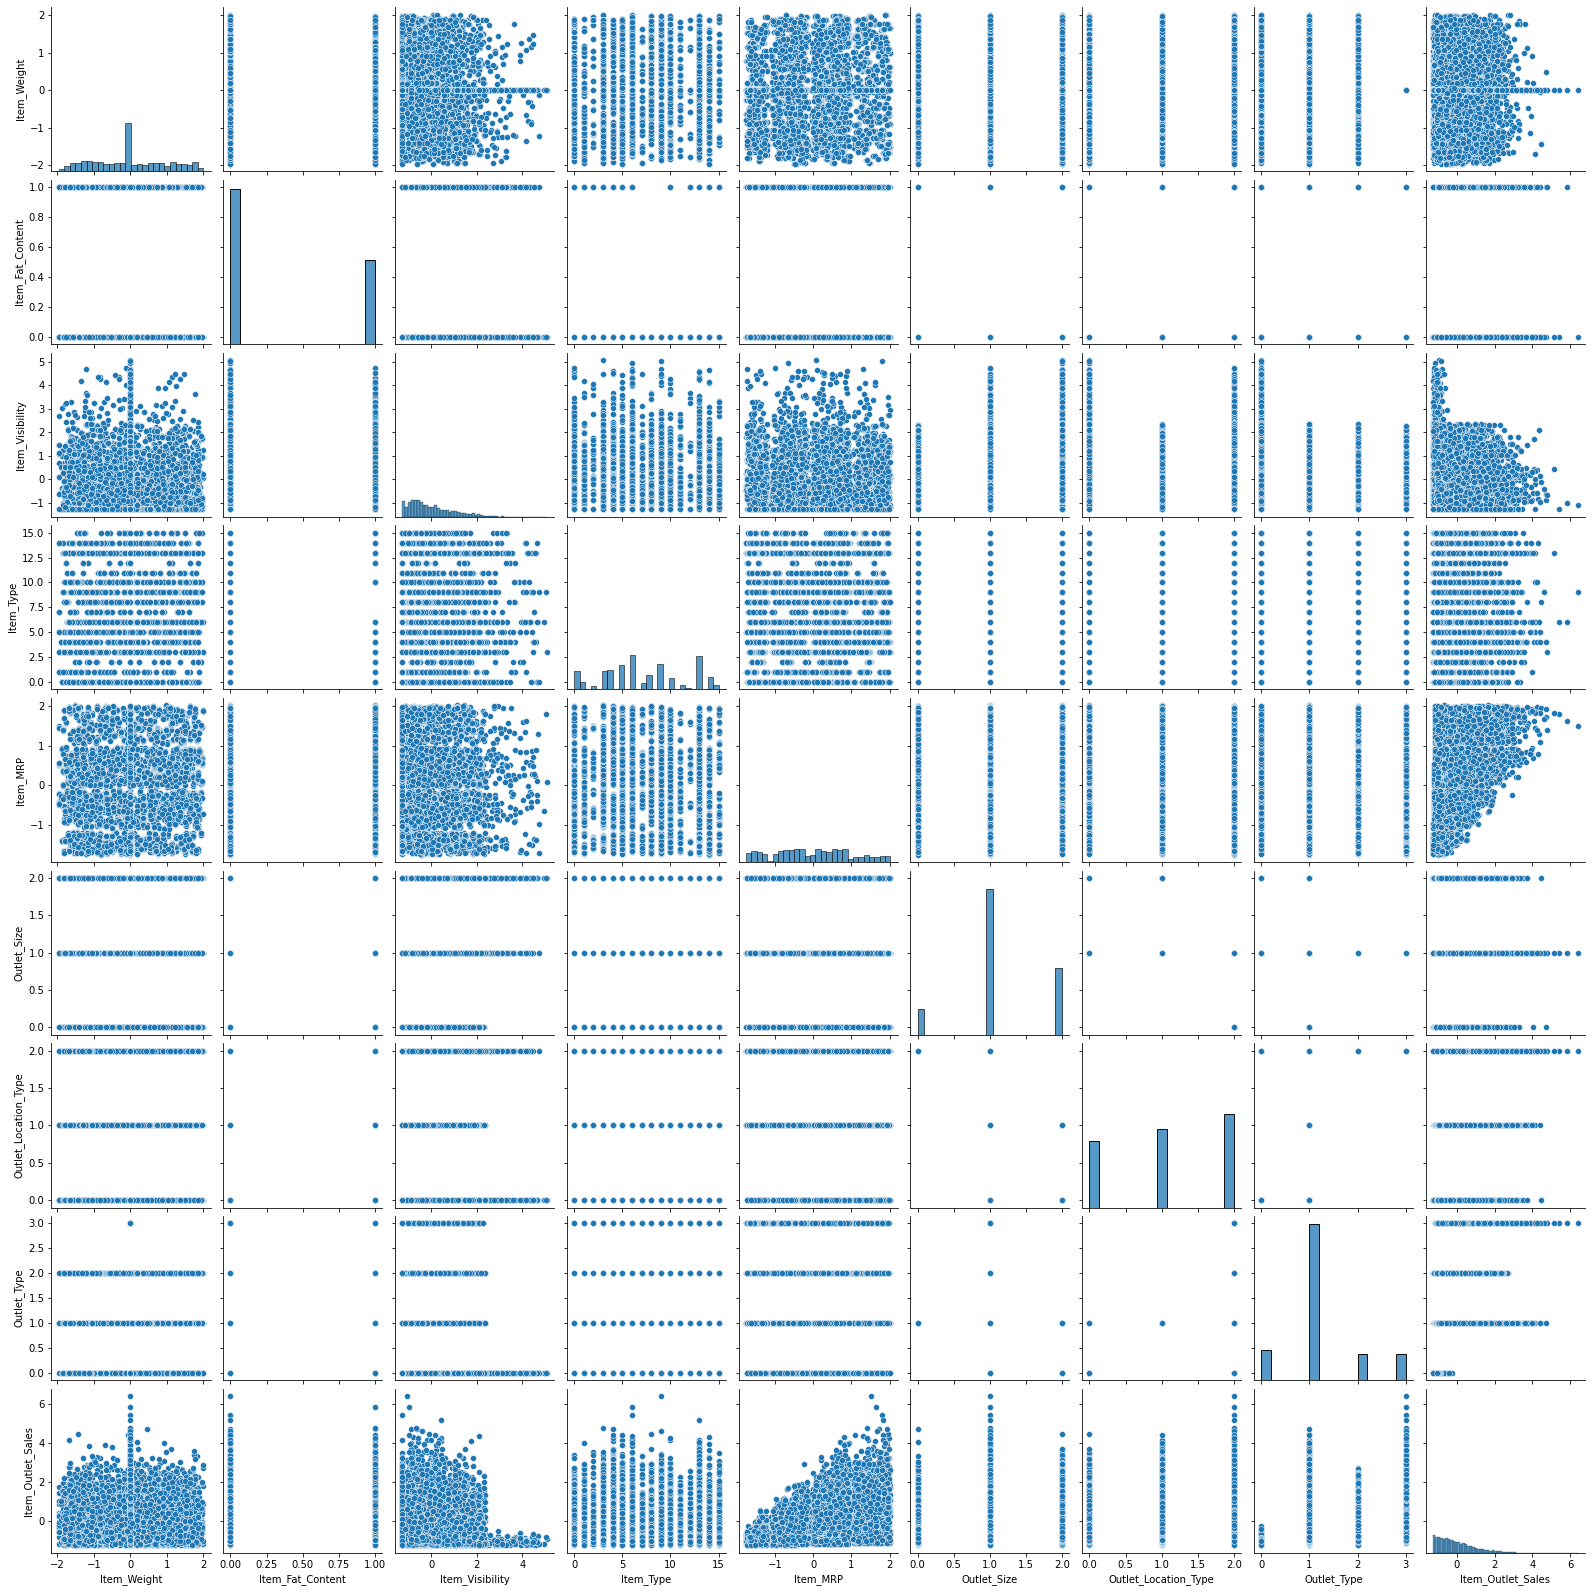

In [ ]:
sns.pairplot(tr_df)

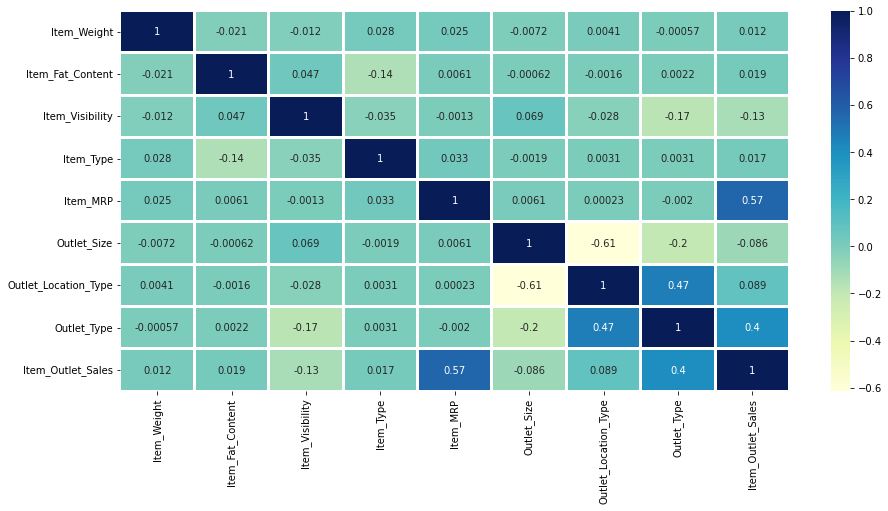

In [ ]:
figure = plt.figure(figsize=[15, 7])
sns.heatmap(tr_df.corr(), annot = True, linewidths = 2, cmap="YlGnBu")

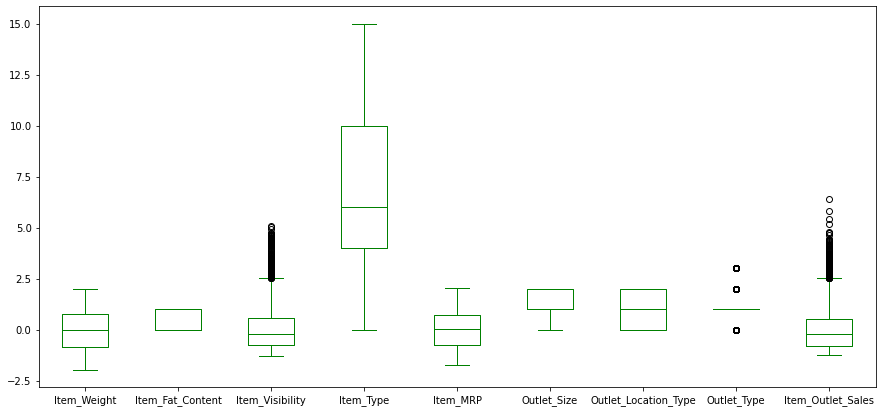

In [ ]:
tr_df.plot(kind='box', figsize=(15, 7), color = 'green')

**Observations**:

- The columns: **"Item_MRP" and "Item_Outlet_Sales"** are showing the strong positve correlation.

- The columns: **"Item_Visibility" and "Item_Outlet_Sales"** are showing the highest negative correlation.

- There is no relationships between the predictor variables. 

- There are maximum number of outliers in column:**"Item_Outlet_Sales"**.

# **Evaluating the Model**

In [24]:
tr_df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,-0.841872,0,-0.970732,4,1.747454,1,0,1,0.910601
1,-1.641706,1,-0.908111,14,-1.489023,1,2,2,-1.018440
2,1.098554,0,-0.956917,10,0.010040,1,0,1,-0.049238
3,1.500838,1,-1.281758,6,0.660050,1,2,0,-0.849103
4,-0.929428,0,-1.281758,9,-1.399220,0,2,1,-0.695373


In [25]:
X = tr_df.iloc[:,0:8]
Y = tr_df['Item_Outlet_Sales']

In [26]:
print('X_Shape:',X.shape)
print('Y_Shape:',Y.shape)

X_Shape: (8523, 8)
Y_Shape: (8523,)


In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 123 )

In [28]:
print('Train_Dataset:',X_train.shape, Y_train.shape)
print('Test Dataset:',X_test.shape, Y_test.shape)

Train_Dataset: (6818, 8) (6818,)
Test Dataset: (1705, 8) (1705,)


In [29]:
lr = LinearRegression()
lr.fit(X_train, Y_train)
y_hat = lr.predict(X_test)

In [30]:
lr.intercept_

-0.19934784644395845

In [31]:
lr.coef_

array([-0.00174629,  0.03443256, -0.04312917, -0.0016457 ,  0.57392171,
       -0.19088774, -0.24360205,  0.58103567])

In [32]:
def modelEval(actual, pred):
  rmse = np.sqrt(mean_squared_error(actual, pred))
  r_Sqr = r2_score(actual, pred) 
  print("RMSE of Model :",rmse)
  print("R2 of the Model :", r_Sqr)

In [33]:
modelEval(Y_test, y_hat)

RMSE of Model : 0.6874476889373022
R2 of the Model : 0.5193320833416879


In [34]:
print("Y_test Shape:",Y_test.shape)
Y_test

Y_test Shape: (1705,)


4532   -0.997371
186    -0.892803
7557   -0.720344
6308   -0.873294
7297    1.380766
          ...   
3045    0.025287
629    -0.316900
746    -0.962255
2661   -0.540862
6153   -0.066796
Name: Item_Outlet_Sales, Length: 1705, dtype: float64

In [ ]:
y_hat

array([-1.10371604, -0.35179117,  0.6448416 , ..., -0.51430339,
        1.06706103,  0.4182207 ])

In [35]:
y_hat_pred = lr.predict(X_train)
y_hat_pred

array([-1.19244422, -0.80512883, -0.19568929, ..., -0.88724008,
        0.07022696, -0.44442097])

In [36]:
modelEval(Y_train, y_hat_pred)

RMSE of Model : 0.7049850846849444
R2 of the Model : 0.5049943614119305


**Observations:**

- The total no. of rows in the **Train dataset** is 6818 (**80%**) and in **Test dataset** is 1705 (**20%**).

- As per the coefficient values, we observe that the variables : **'Item_MRP' and 'Outlet_Type'** contribute highest to the dependent variable: **'Item_Outlet_Sales'**. 

- The **RMSE values** obtained from both the **Train and Test data** is approximately **0.7**.

- The **R2 values** obtained for both Train and Test data is approximately **0.5**.

